Achmad Fariz Rizky Yanuar. Universitas Sriwijaya.


# **1. Perkenalan Dataset**


### **Beverage Sales Dataset**  

#### **Tentang Dataset**  
Dataset ini dibuat untuk mensimulasikan pola penjualan yang realistis dalam industri minuman, dengan menyoroti faktor-faktor penting seperti preferensi regional, fluktuasi musiman, dan segmentasi pelanggan. Dataset ini mencakup transaksi **Business-to-Business (B2B)** dan **Business-to-Consumer (B2C)**, sehingga dapat digunakan untuk berbagai analisis.  

Dataset ini dapat digunakan untuk mengeksplorasi tren penjualan, menganalisis perilaku pelanggan, dan mengembangkan strategi pemasaran berbasis data.  

#### **Fitur dalam Dataset**  
1. **Order_ID** → ID unik untuk setiap pesanan. Satu pesanan dapat berisi beberapa produk.  
2. **Customer_ID** → ID unik untuk setiap pelanggan, membedakan pembeli individu.  
3. **Customer_Type** → Jenis pelanggan: **B2B** (business-to-business) atau **B2C** (business-to-consumer).  
4. **Product** → Nama produk yang dibeli, seperti "Coca-Cola" atau "Erdinger Weißbier".  
5. **Category** → Kategori produk, seperti "Soft Drinks" atau "Alcoholic Beverages".  
6. **Unit_Price** → Harga per unit dari produk.  
7. **Quantity** → Jumlah unit produk yang dibeli dalam satu pesanan.  
8. **Discount** → Diskon yang diberikan pada produk (misalnya, 0.1 untuk 10%). Hanya berlaku untuk pelanggan B2B.  
9. **Total_Price** → Total harga produk setelah diskon diterapkan.  
10. **Region** → Wilayah tempat pelanggan berada, seperti "Bayern" atau "Berlin".  
11. **Order_Date** → Tanggal pemesanan dilakukan.  

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# **3. Memuat Dataset**

In [2]:
# Download dataset
DATASET_NAME = "sebastianwillmann/beverage-sales"
dataset_path = kagglehub.dataset_download(DATASET_NAME)
print("Dataset path:", dataset_path)

# Cek isi folder dataset
files = os.listdir(dataset_path)
print("Files in dataset folder:", files)

# Path ke file CSV
dataset_path = "/root/.cache/kagglehub/datasets/sebastianwillmann/beverage-sales/versions/1"
csv_file = os.path.join(dataset_path, "synthetic_beverage_sales_data.csv")

100%|██████████| 119M/119M [00:06<00:00, 19.3MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/sebastianwillmann/beverage-sales/versions/1
Files in dataset folder: ['synthetic_beverage_sales_data.csv']


In [3]:
# Load dataset
df = pd.read_csv(csv_file)
df_sampled = df.sample(n=20000, random_state=42) # ambil 20.000 samples

df_sampled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
4990465,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
5995542,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
1044351,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
1802181,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
6900691,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


Untuk analisis ini, saya mengambil sampel sebanyak 20.000 data dari dataset asli menggunakan metode random sampling dengan seed 42 untuk menjaga reprodusibilitas.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Memahami Struktur Data
print("Jumlah Baris dan Kolom:", df_sampled.shape)
print("Tipe Data Tiap Kolom:\n", df_sampled.dtypes)

Jumlah Baris dan Kolom: (20000, 11)
Tipe Data Tiap Kolom:
 Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object


Dataset yang digunakan memiliki 20.000 baris dan 11 kolom. Terdapat kombinasi tipe data, termasuk numerik (`float64` dan `int64`) serta kategorikal (`object`). Beberapa kolom utama yang berhubungan dengan analisis penjualan adalah `Unit_Price`, `Quantity`, `Discount`, dan `Total_Price`, yang semuanya bertipe numerik. Sementara itu, kolom seperti `Customer_Type`, `Product`, `Category`, dan `Region` merupakan data kategorikal yang dapat digunakan untuk segmentasi pelanggan. Kolom `Order_Date` masih dalam format `object` tidak perlu dikonversi karna nantinya tidak akan digunakan.

In [5]:
# Menangani Data yang Hilang
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


Tidak  ditemukan missing value.

In [6]:
# Analisis Distribusi dan Korelasi
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


Berdasarkan hasil statistik deskriptif, nilai rata-rata (mean) untuk `Unit_Price` adalah 5.82, dengan standar deviasi sebesar 14.70, menunjukkan bahwa ada variasi harga yang cukup besar antar produk. `Quantity` memiliki nilai rata-rata sekitar 23, namun distribusinya cukup lebar dengan standar deviasi 26.89 dan nilai maksimum mencapai 100.

Diskon (`Discount`) memiliki rata-rata kecil, sekitar 2.97%, dengan mayoritas transaksi (hingga kuartil ke-75) memiliki diskon 5% atau kurang. Sementara itu, `Total_Price` bervariasi secara signifikan, dengan nilai rata-rata sekitar 130.74 dan standar deviasi yang cukup tinggi (509.69), menunjukkan adanya beberapa transaksi dengan total harga yang sangat besar. Nilai maksimum `Total_Price` mencapai 14.295,3, yang bisa jadi merupakan outlier atau transaksi dalam jumlah besar.

Secara keseluruhan, distribusi nilai dalam dataset menunjukkan keberagaman harga dan jumlah pembelian, yang dapat berpengaruh pada segmentasi pelanggan dalam analisis lebih lanjut.

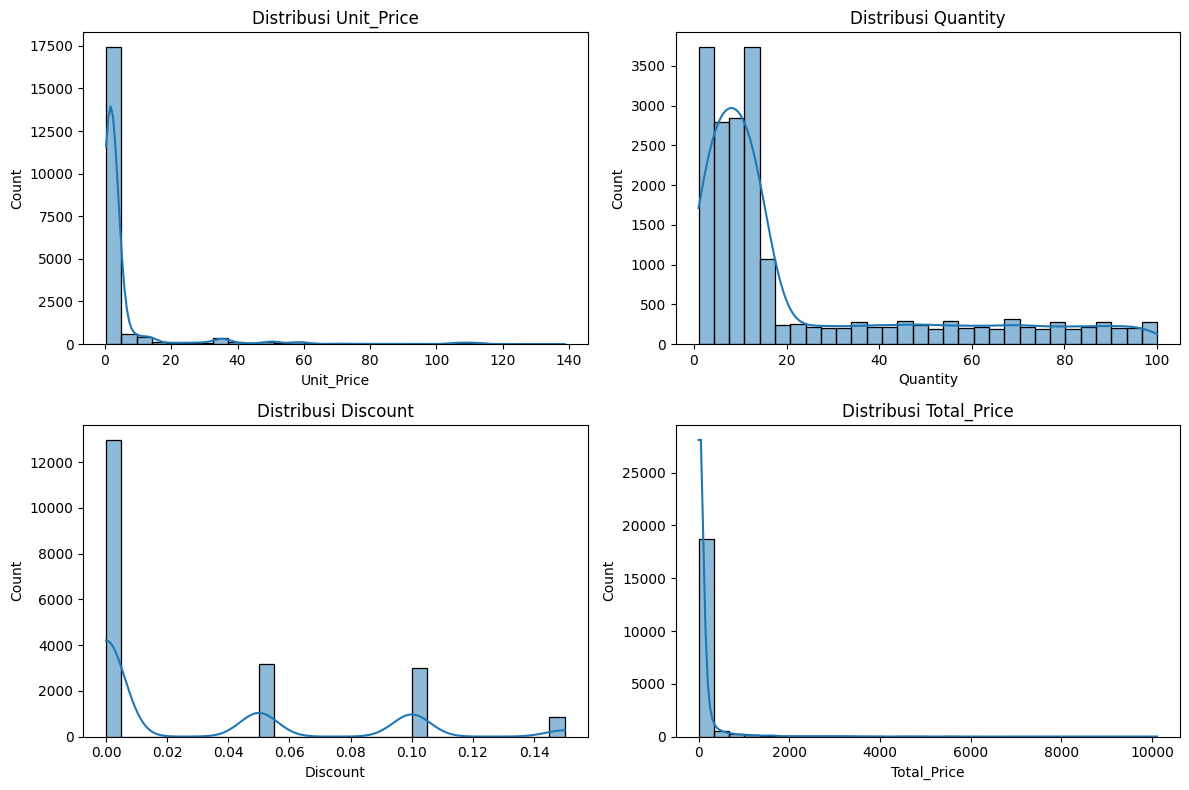

In [7]:
df_numeric = df_sampled.select_dtypes(include=['number'])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[col], bins=30, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi distribusi data numerik, berikut analisis yang dapat disimpulkan dengan mengacu pada statistik deskriptif sebelumnya:  

- **Distribusi Unit_Price**  
   - Grafik menunjukkan distribusi yang sangat condong ke kanan (skewed right), di mana mayoritas produk memiliki harga yang rendah, dengan lonjakan signifikan di kisaran harga kecil (sekitar 1-5).  
   - Sejalan dengan statistik deskriptif, mean (5.82) lebih besar dari median (1.75), mengindikasikan bahwa ada beberapa produk dengan harga yang jauh lebih tinggi (hingga 138.72), yang menyebabkan skewness.  

-  **Distribusi Quantity**  
   - Grafik menunjukkan bahwa sebagian besar transaksi melibatkan pembelian dalam jumlah kecil (di bawah 20 unit). Namun, ada beberapa outlier dengan jumlah pembelian besar hingga 100 unit.  
   - Distribusi ini sesuai dengan statistik deskriptif yang menunjukkan rata-rata 22.85 dengan standar deviasi tinggi (26.65), menandakan adanya perbedaan yang cukup besar dalam jumlah pembelian antar transaksi.  

- **Distribusi Discount**  
   - Grafik menunjukkan bahwa mayoritas transaksi tidak mendapatkan diskon atau hanya menerima diskon kecil, dengan beberapa lonjakan pada nilai tertentu seperti 0.05, 0.10, dan 0.15.  
   - Ini konsisten dengan statistik deskriptif yang menunjukkan median 0 dan rata-rata diskon hanya sekitar 2.97%.  

- **Distribusi Total_Price**  
   - Distribusi total harga sangat mirip dengan distribusi Unit_Price, dengan kecenderungan mayoritas transaksi bernilai kecil.  
   - Terdapat beberapa transaksi dengan nilai yang sangat tinggi (outlier), yang sesuai dengan standar deviasi besar (509.69) dan nilai maksimum yang mencapai 14.295,3.  

Secara keseluruhan, distribusi ini menunjukkan pola yang tidak seimbang dengan kehadiran beberapa outlier di semua fitur numerik. Hal ini dapat berpengaruh terhadap analisis lebih lanjut, terutama dalam segmentasi pelanggan atau model prediksi yang akan dibuat.

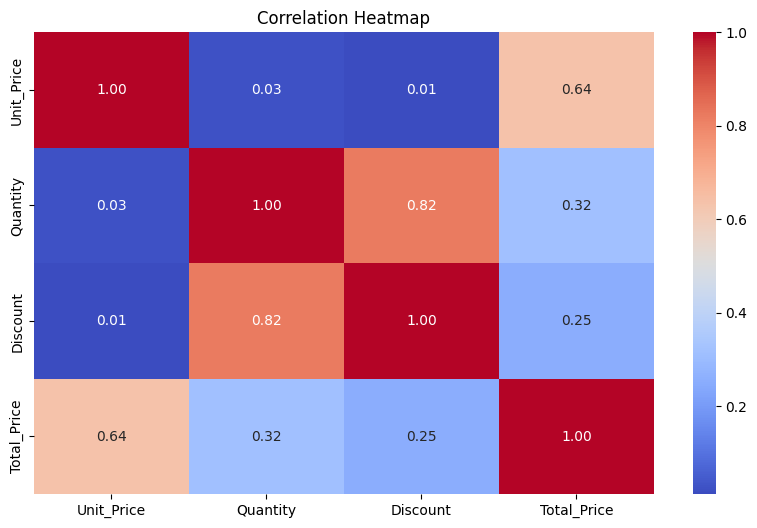

In [8]:
# Corr
# Pilih hanya kolom numerik untuk heatmap
df_numeric = df_sampled.select_dtypes(include=['number'])

# Visualisasi Heatmap sebelum pemilihan fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Dari heatmap korelasi:

- Unit_Price memiliki korelasi cukup tinggi dengan Total_Price (0.64), yang menunjukkan bahwa harga unit berkontribusi signifikan terhadap total harga.

- Quantity memiliki korelasi kuat dengan Discount (0.82), yang mengindikasikan bahwa pelanggan yang membeli dalam jumlah besar cenderung mendapatkan diskon lebih besar.

- Discount juga memiliki korelasi positif dengan Total_Price (0.25), meskipun lebih rendah, yang menunjukkan bahwa diskon masih berdampak pada total harga yang dibayarkan pelanggan.

- Korelasi antara Unit_Price dan Quantity sangat rendah (0.03), yang berarti harga produk tidak banyak mempengaruhi jumlah pembelian.


 Distribusi Customer_Type:
Customer_Type
B2C    12979
B2B     7021
Name: count, dtype: int64


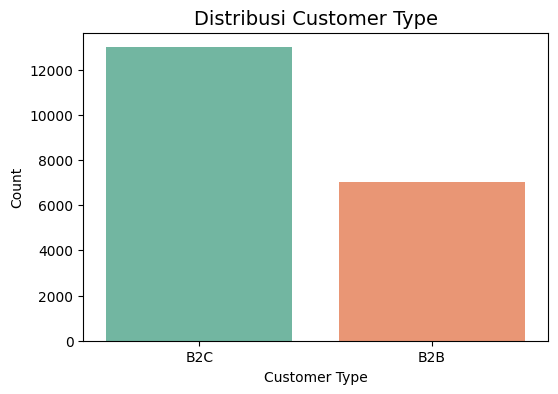

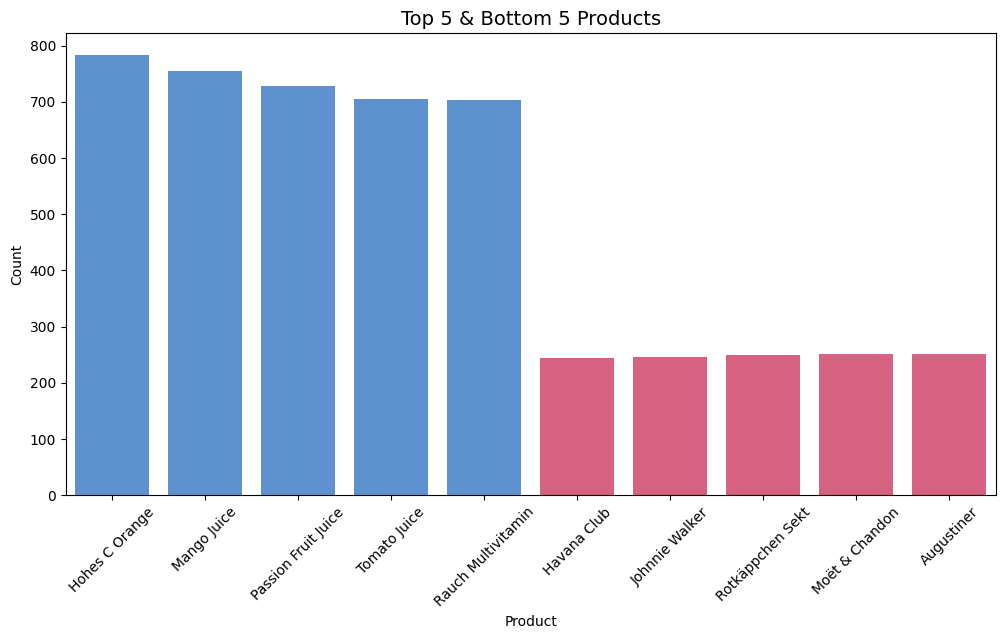


 Semua Product Count:
Product
Hohes C Orange         783
Mango Juice            755
Passion Fruit Juice    729
Tomato Juice           705
Rauch Multivitamin     704
Cranberry Juice        702
Granini Apple          687
San Pellegrino         598
Vio Wasser             577
Volvic                 576
Vittel                 574
Evian                  570
Selters                554
Volvic Touch           536
Apollinaris            533
Gerolsteiner           521
Fritz-Kola             493
Sprite                 484
Rockstar               409
Coca-Cola              408
Pepsi                  407
Fanta                  391
Club Mate              388
Monster                388
Mountain Dew           386
Schwip Schwap          380
Mezzo Mix              380
Red Bull               368
Beck's                 328
Krombacher             288
Riesling               287
Jever                  280
Jack Daniels           271
Tanqueray              265
Bacardi                258
Veuve Clicquot         2

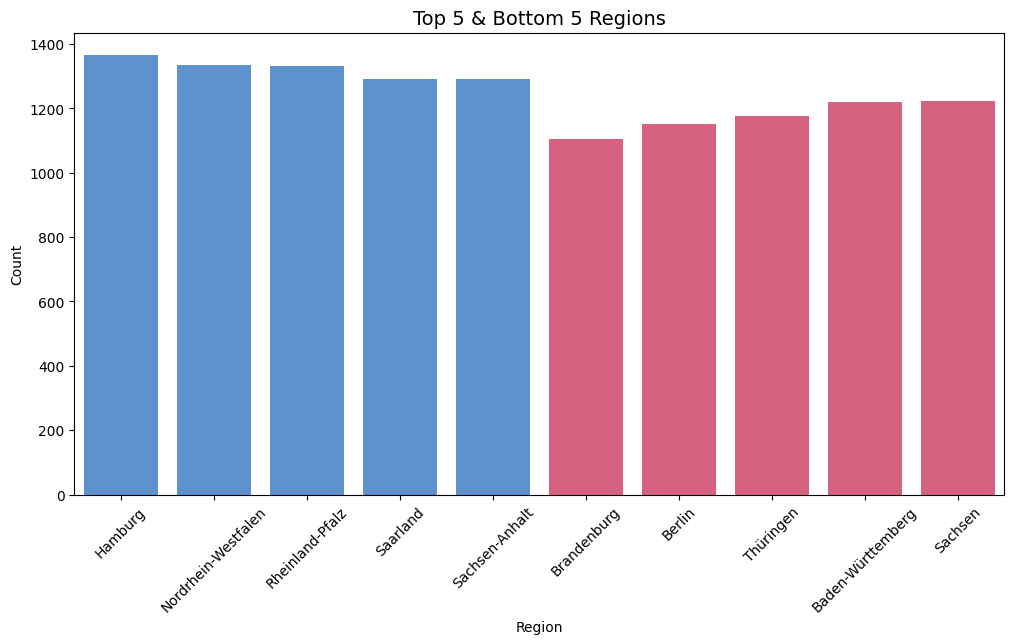


 Semua Region Count:
Region
Hamburg                   1367
Nordrhein-Westfalen       1334
Rheinland-Pfalz           1332
Saarland                  1290
Sachsen-Anhalt            1290
Niedersachsen             1277
Bayern                    1270
Bremen                    1258
Mecklenburg-Vorpommern    1241
Hessen                    1240
Schleswig-Holstein        1229
Sachsen                   1224
Baden-Württemberg         1219
Thüringen                 1176
Berlin                    1150
Brandenburg               1103
Name: count, dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Komentar tentang Order_ID & Customer_ID ----
# Tidak perlu dimasukkan ke visualisasi karena hanya ID unik
# Order_ID dan Customer_ID akan di-drop nanti

# ---- Analisis Kategori ----
# ---- Distribusi Customer Type ----
if 'Customer_Type' in df_sampled.columns:
    customer_counts = df_sampled['Customer_Type'].value_counts()

    print("\n Distribusi Customer_Type:")
    print(customer_counts)

    # Visualisasi Customer Type (tanpa warning)
    plt.figure(figsize=(6, 4))
    sns.barplot(
        x=customer_counts.index,
        y=customer_counts.values,
        hue=customer_counts.index,  # Tambahkan hue
        palette="Set2",
        legend=False  # Hindari warning
    )
    plt.title("Distribusi Customer Type", fontsize=14)
    plt.xlabel("Customer Type")
    plt.ylabel("Count")
    plt.show()


# ---- Visualisasi Top & Bottom 5 Product ----
if 'Product' in df_sampled.columns:
    product_counts = df_sampled['Product'].value_counts()

    # Ambil Top 5 & Bottom 5
    top_products = product_counts.nlargest(5)
    bottom_products = product_counts.nsmallest(5)

    # Gabungkan untuk visualisasi
    top_bottom_products = pd.concat([top_products, bottom_products])

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_bottom_products.index,
        y=top_bottom_products.values,
        hue=top_bottom_products.index,
        dodge=False,  # Mengatasi FutureWarning
        palette=sns.color_palette(["#4A90E2"] * 5 + ["#E94E77"] * 5)
    )
    plt.title("Top 5 & Bottom 5 Products", fontsize=14)
    plt.xlabel("Product")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  # Hide legend
    plt.show()

    # Print semua count product
    print("\n Semua Product Count:")
    print(product_counts)

# ---- Visualisasi Top & Bottom 5 Region ----
if 'Region' in df_sampled.columns:
    region_counts = df_sampled['Region'].value_counts()

    # Ambil Top 5 & Bottom 5
    top_regions = region_counts.nlargest(5)
    bottom_regions = region_counts.nsmallest(5)

    # Gabungkan untuk visualisasi
    top_bottom_regions = pd.concat([top_regions, bottom_regions])

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_bottom_regions.index,
        y=top_bottom_regions.values,
        hue=top_bottom_regions.index,
        dodge=False,  # Mengatasi FutureWarning
        palette=sns.color_palette(["#4A90E2"] * 5 + ["#E94E77"] * 5)
    )
    plt.title("Top 5 & Bottom 5 Regions", fontsize=14)
    plt.xlabel("Region")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  # Hide legend
    plt.show()

    # Print semua count region
    print("\n Semua Region Count:")
    print(region_counts)


**Customer Type Analysis**  
Customer Type terdiri dari dua kategori utama, yaitu B2C (Business-to-Consumer) dan B2B (Business-to-Business). Mayoritas pelanggan berasal dari segmen B2C, yang menunjukkan bahwa sebagian besar transaksi dilakukan oleh individu dibandingkan bisnis.  

- **Jumlah kategori unik**: 2 (B2C dan B2B)  
- **Distribusi pelanggan**:  
  - B2C: 12.979 pelanggan (64,9%)  
  - B2B: 7.021 pelanggan (35,1%)  

**Product Analysis**  
Terdapat berbagai jenis produk yang dijual, dengan beberapa produk memiliki volume transaksi yang jauh lebih tinggi dibandingkan yang lain. Produk jus buah mendominasi daftar dengan jumlah transaksi terbanyak, sedangkan minuman beralkohol atau premium memiliki jumlah transaksi lebih rendah.  

- **Jumlah produk unik**: 47  
- **Produk dengan transaksi terbanyak**:  
  - Hohes C Orange (783 transaksi)  
  - Mango Juice (755 transaksi)  
  - Passion Fruit Juice (729 transaksi)  
  - Tomato Juice (705 transaksi)  
  - Rauch Multivitamin (704 transaksi)  
- **Produk dengan transaksi paling sedikit**:  
  - Havana Club (244 transaksi)  
  - Johnnie Walker (245 transaksi)  
  - Rotkäppchen Sekt (250 transaksi)  
  - Moët & Chandon (252 transaksi)  
  - Augustiner (252 transaksi)  

**Region Analysis**  
Dataset mencakup transaksi dari berbagai wilayah. Beberapa wilayah memiliki volume transaksi yang jauh lebih tinggi dibandingkan yang lain. Kota-kota besar seperti Hamburg dan Nordrhein-Westfalen mendominasi, sedangkan beberapa wilayah lain memiliki jumlah transaksi yang lebih rendah.  

- **Jumlah region unik**: 16  
- **Region dengan transaksi terbanyak**:  
  - Hamburg (1.367 transaksi)  
  - Nordrhein-Westfalen (1.334 transaksi)  
  - Rheinland-Pfalz (1.332 transaksi)  
  - Saarland (1.290 transaksi)  
  - Sachsen-Anhalt (1.290 transaksi)  
- **Region dengan transaksi paling sedikit**:  
  - Brandenburg (1.103 transaksi)  
  - Berlin (1.150 transaksi)  
  - Thüringen (1.176 transaksi)  
  - Baden-Württemberg (1.219 transaksi)  
  - Sachsen (1.224 transaksi)  

Hasil analisis ini menunjukkan bahwa mayoritas transaksi berasal dari pelanggan individu (B2C), produk jus memiliki permintaan yang lebih tinggi dibandingkan minuman lain, dan distribusi transaksi cukup merata dengan beberapa region mendominasi jumlah transaksi secara signifikan.

In [10]:
# Distribusi Order ID dan Customer ID
# Menghitung jumlah unik Order ID dan Customer ID
num_unique_order_id = df_sampled['Order_ID'].nunique()
num_unique_customer_id = df_sampled['Customer_ID'].nunique()

# Menampilkan hasil
print(f"Jumlah unique Order ID: {num_unique_order_id}")
print(f"Jumlah unique Customer ID: {num_unique_customer_id}")


Jumlah unique Order ID: 19945
Jumlah unique Customer ID: 8624


Dari total 20.000 data transaksi, terdapat 19.945 unique Order ID dan 8.624 unique Customer ID.

- **Order ID:** Sebagian besar pesanan dalam dataset ini memiliki Order ID yang unik, dengan hanya sedikit yang muncul lebih dari sekali. Hal ini menunjukkan bahwa mayoritas transaksi bersifat individual tanpa banyak pemesanan gabungan.

- **Customer ID:** Dengan jumlah Customer ID yang jauh lebih kecil dibandingkan Order ID, ini mengindikasikan bahwa banyak pelanggan melakukan lebih dari satu transaksi. Hal ini bisa terjadi karena pelanggan yang melakukan pembelian berulang atau adanya pelanggan setia yang sering berbelanja.

# **5. Data Preprocessing**

In [11]:
# Penanganan Missing Values
# Cek ulang apakah ada missing values
missing_values = df_sampled.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


Tidak ditemukan adanya missing values.

In [12]:
# Cek Duplikat
duplicate_count = df_sampled.duplicated().sum()
print(f"Jumlah duplikat dalam dataset: {duplicate_count}")

Jumlah duplikat dalam dataset: 0


Tidak ditemukan duplikat

In [13]:
# Menghapus Fitur yang Tidak Diperlukan
drop_columns = ["Order_ID", "Customer_ID"]
df_sampled.drop(columns=drop_columns, inplace=True)

print("Fitur yang dihapus:", drop_columns)

Fitur yang dihapus: ['Order_ID', 'Customer_ID']


In [14]:
df_sampled.head(1)

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
4990465,B2B,Hohes C Orange,Juices,1.87,74,0.1,124.54,Niedersachsen,2023-11-29


Fitur Order_ID dan Customer_ID telah dihapus karna mereka itu cuman isinya unik dan tidak meaningful untuk clustering.

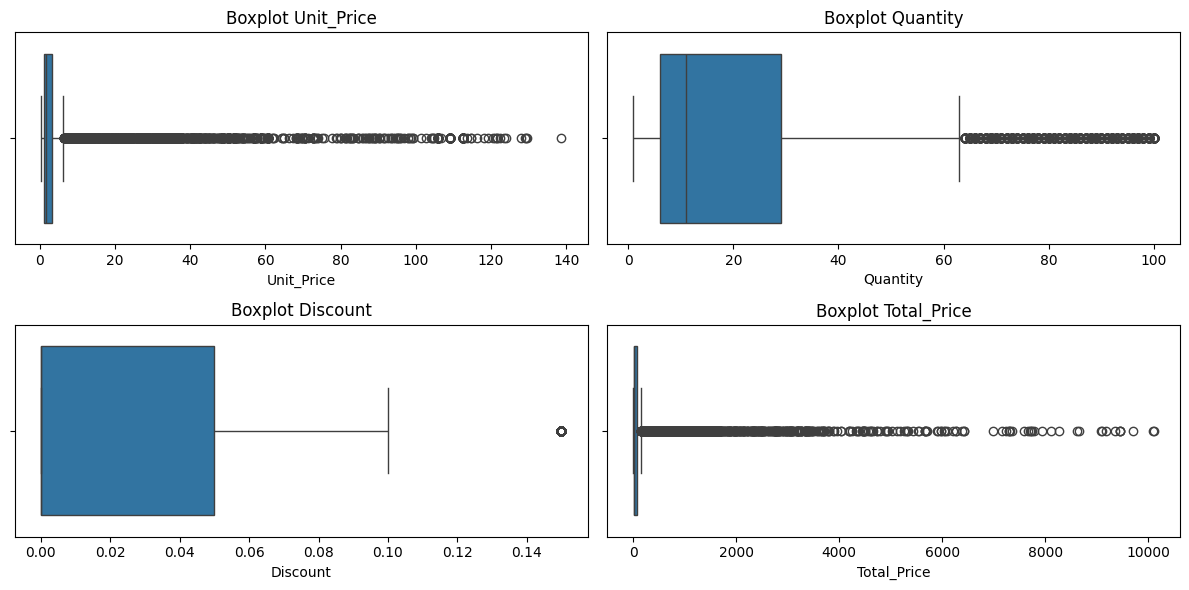

Jumlah outlier per fitur:
 Unit_Price     2429
Quantity       2556
Discount        849
Total_Price    2632
dtype: int64


In [15]:
# Deteksi dan Penanganan Outlier dengan IQR
numerical_cols = ["Unit_Price", "Quantity", "Discount", "Total_Price"]
outliers = pd.DataFrame()

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_sampled[col])
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

for col in numerical_cols:
    Q1 = df_sampled[col].quantile(0.25)
    Q3 = df_sampled[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df_sampled[col] < lower_bound) | (df_sampled[col] > upper_bound)
    outliers[col] = outlier_mask

# Hitung jumlah outlier per fitur
outlier_counts = outliers.sum()
print("Jumlah outlier per fitur:\n", outlier_counts)

Berdasarkan hasil perhitungan menggunakan metode Interquartile Range (IQR), jumlah outlier yang terdeteksi untuk setiap fitur numerik adalah:

- Unit_Price: 2,429 sampel

- Quantity: 2,556 sampel

- Discount: 849 sampel

- Total_Price: 2,632 sampel

Hasil ini juga didukung oleh visualisasi boxplot yang menunjukkan bahwa beberapa fitur memiliki outlier dalam jumlah yang cukup banyak, terutama pada Unit_Price, Quantity, dan Total_Price, yang memiliki banyak titik data di luar batas whisker.

In [16]:
# Menghapus outlier
initial_shape = df_sampled.shape
df_sampled = df_sampled[~outliers.any(axis=1)].reset_index(drop=True)
final_shape = df_sampled.shape

print(f"Dataset sebelum menghapus outlier: {initial_shape[0]} rows")
print(f"Dataset setelah menghapus outlier: {final_shape[0]} rows")
print(f"Jumlah data yang dihapus: {initial_shape[0] - final_shape[0]} rows")

Dataset sebelum menghapus outlier: 20000 rows
Dataset setelah menghapus outlier: 15088 rows
Jumlah data yang dihapus: 4912 rows


4,912 sampel dihapus dari dataset karena terdeteksi sebagai outlier. Penghapusan ini dilakukan untuk meningkatkan efektivitas proses clustering dengan menghilangkan nilai ekstrem yang dapat mempengaruhi hasil analisis.

In [17]:
# Encoding Data Kategorikal (Customer_Type only)
# Encoding Customer_Type menjadi 0 untuk B2B dan 1 untuk B2C
label_encoder = LabelEncoder()
df_sampled["Customer_Type"] = label_encoder.fit_transform(df_sampled["Customer_Type"])
print("Unique values in Customer_Type:", df_sampled["Customer_Type"].unique())

Unique values in Customer_Type: [0 1]


Customer_Type telah di-encode menjadi 0 (B2B) dan 1 (B2C).

In [18]:
# Memilih fitur untuk clustering
clustering_features = ["Unit_Price", "Quantity", "Discount", "Total_Price", "Customer_Type"]

Saya memutuskan untuk tidak menggunakan fitur `Product`, `Category`, dan `Region` karena ketiga fitur ini memiliki banyak variasi kategori yang dapat membuat proses clustering menjadi kurang efektif. Satu-satunya fitur kategorikal yang saya pilih untuk dimasukkan adalah `Customer_Type`, karena hanya memiliki dua nilai (B2B dan B2C) dan telah saya encoding menjadi 0 dan 1, sehingga tetap sederhana namun tetap memberikan informasi yang berguna. Meskipun one-hot encoding bisa diterapkan pada fitur kategorikal lainnya, saya memilih untuk tidak memasukkannya dengan alasan efisiensi dan kesederhanaan dalam proses clustering.  

In [19]:
# Normalisasi/Standarisasi Fitur Numerik
clustering_features = ["Unit_Price", "Quantity", "Discount", "Total_Price", "Customer_Type"]
scaler = StandardScaler()
df_sampled[clustering_features] = scaler.fit_transform(df_sampled[clustering_features])

In [20]:
df_sampled[clustering_features].head(2)

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type
0,0.080128,0.335893,1.115746,0.409500,-1.797188
1,-0.140397,-0.693163,-0.515808,-0.626697,0.556425


In [21]:
df_sampled[clustering_features]

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type
0,0.080128,0.335893,1.115746,0.409500,-1.797188
1,-0.140397,-0.693163,-0.515808,-0.626697,0.556425
2,-0.044516,-0.619659,-0.515808,-0.539464,0.556425
3,0.013012,0.115381,-0.515808,0.206500,0.556425
4,-0.773209,-0.546155,1.115746,-0.666237,-1.797188
...,...,...,...,...,...
15083,-1.099203,0.115381,-0.515808,-0.502777,0.556425
15084,1.269048,-0.178635,-0.515808,0.500402,0.556425
15085,-0.888266,-0.840171,-0.515808,-0.823990,0.556425
15086,-0.821150,0.188885,1.115746,-0.317713,-1.797188


Fitur numerik telah dinormalisasi menggunakan StandardScaler. Normalisasi ini bertujuan untuk membawa semua nilai ke dalam rentang 0 hingga 1, sehingga setiap fitur memiliki skala yang sama dan tidak mendominasi dalam proses clustering.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan dan Evaluasi Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

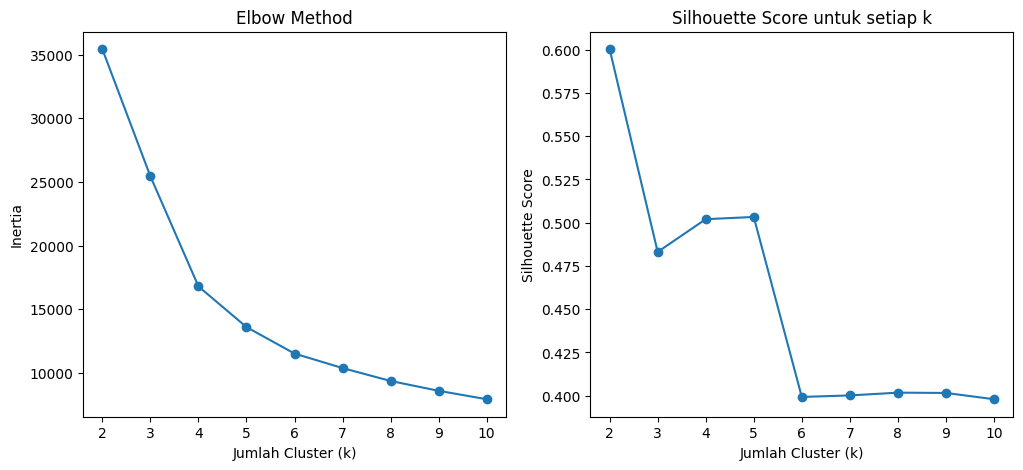

Evaluasi Model Clustering:
Jumlah Cluster | Inertia | Silhouette Score
2              | 35417.52 | 0.6002
3              | 25441.23 | 0.4831
4              | 16803.93 | 0.5020
5              | 13610.99 | 0.5033
6              | 11531.79 | 0.3993
7              | 10395.35 | 0.4002
8              | 9382.23 | 0.4018
9              | 8610.35 | 0.4016
10             | 7949.77 | 0.3980


In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Mencari jumlah cluster optimal (range 2-10)
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_sampled[clustering_features])

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_sampled[clustering_features], kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk setiap k")

plt.show()

# Cetak hasil evaluasi
print("Evaluasi Model Clustering:")
print("Jumlah Cluster | Inertia | Silhouette Score")
for i, k in enumerate(K_range):
    print(f"{k:<14} | {inertia[i]:.2f} | {silhouette_scores[i]:.4f}")

Pada tahap ini, dilakukan evaluasi untuk menentukan jumlah cluster yang optimal menggunakan **Elbow Method** dan **Silhouette Score**.

1. Elbow Method (Inertia)
- Inertia menunjukkan seberapa dekat data dalam suatu cluster terhadap centroidnya.  
- Dari hasil evaluasi, nilai inertia mengalami penurunan signifikan dari k=2 hingga k=4, setelah itu mulai melandai.  
- Ini menunjukkan bahwa k=4 atau k=5 mungkin menjadi jumlah cluster optimal.

2. Silhouette Score
- Silhouette Score mengukur seberapa baik setiap titik data dikelompokkan dalam clusternya.
- Skor tertinggi diperoleh pada k=2 (0.6002), tetapi hanya memiliki dua kelompok yang mungkin terlalu sedikit untuk segmentasi customer.
- k=4 dan k=5 memiliki skor sekitar 0.50, yang masih cukup baik.
- Setelah k=6, Silhouette Score turun di bawah 0.40, menandakan clustering yang kurang optimal.

Kesimpulan
- Berdasarkan Elbow Method dan Silhouette Score, jumlah cluster yang optimal kemungkinan k=4 atau k=5.
- Kedua jumlah cluster ini memiliki keseimbangan antara pemisahan yang jelas dan segmentasi yang lebih mendetail.
- Selanjutnya, model K-Means akan dibangun dengan k=4 atau k=5, dan hasil clustering akan dianalisis lebih lanjut.


In [33]:
from sklearn.cluster import KMeans

# Pilih jumlah cluster optimal
optimal_k = 5

# Inisialisasi dan fit model KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_sampled["Cluster"] = kmeans.fit_predict(df_sampled[clustering_features])

# Lihat distribusi data per cluster
print("Distribusi data per cluster k=5 :")
print(df_sampled["Cluster"].value_counts())

# Centroid dari setiap cluster
print("\nCentroid dari setiap cluster:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=clustering_features))

Distribusi data per cluster k=5 :
Cluster
2    8220
1    3313
3    1562
0    1266
4     727
Name: count, dtype: int64

Centroid dari setiap cluster:
   Unit_Price  Quantity  Discount  Total_Price  Customer_Type
0   -0.622754  2.254778  1.841310     0.919746      -1.797188
1    1.428978 -0.345500 -0.509898     0.248224       0.547900
2   -0.483520 -0.420259 -0.515808    -0.502164       0.556425
3   -0.368479  0.045548  1.415526    -0.197223      -1.797188
4    0.831229  2.301898  1.907958     3.368752      -1.797188


In [34]:
from sklearn.cluster import KMeans

# Pilih jumlah cluster optimal
optimal_k = 4  # atau 5, sesuaikan dengan analisis sebelumnya

# Inisialisasi dan fit model KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_sampled["Cluster"] = kmeans.fit_predict(df_sampled[clustering_features])

# Lihat distribusi data per cluster
print("Distribusi data per cluster k=4 :")
print(df_sampled["Cluster"].value_counts())

# Centroid dari setiap cluster
print("\nCentroid dari setiap cluster:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=clustering_features))

Distribusi data per cluster k=4 :
Cluster
1    8220
2    3314
3    2020
0    1534
Name: count, dtype: int64

Centroid dari setiap cluster:
   Unit_Price  Quantity  Discount  Total_Price  Customer_Type
0    0.119912  2.436077  1.912378     2.249136      -1.797188
1   -0.483520 -0.420259 -0.515808    -0.502164       0.556425
2    1.429271 -0.345472 -0.509408     0.248380       0.547192
3   -0.468323  0.426973  1.482442    -0.072041      -1.797188


**Analisis Hasil Clustering**  

Pada tahap ini, dilakukan pengelompokan data menggunakan algoritma K-Means dengan jumlah cluster k = 4 dan k = 5. Berdasarkan evaluasi, k = 4 dipilih sebagai jumlah cluster optimal karena memiliki silhouette score yang lebih tinggi (0.5020) dibandingkan k = 5 (0.5033), namun tetap menghasilkan segmentasi yang lebih seimbang tanpa ada cluster yang terlalu kecil.  

**Distribusi Data per Cluster**  

Hasil clustering dengan k = 4 menunjukkan bahwa mayoritas data berada di Cluster 1 dengan 8220 sampel, sedangkan Cluster 0 memiliki 1534 sampel. Perbedaan jumlah ini masih dalam rentang yang wajar, sehingga segmentasi tetap relevan untuk analisis lebih lanjut.  

Ketika jumlah cluster dinaikkan menjadi k = 5, distribusi data menjadi lebih tidak seimbang, dengan Cluster 4 hanya memiliki 727 sampel. Hal ini mengindikasikan bahwa penambahan cluster tidak selalu meningkatkan segmentasi yang baik, sehingga k = 4 tetap menjadi pilihan terbaik.   

**Kesimpulan**  

- k = 4 lebih stabil dibandingkan k = 5, karena tidak ada cluster yang terlalu kecil (di bawah 1000 sampel).  
- Cluster dengan diskon tinggi menarik untuk dianalisis lebih lanjut, apakah pelanggan di cluster ini adalah pelanggan loyal atau hanya memanfaatkan promo.  
- Jumlah pelanggan per cluster cukup bervariasi, memungkinkan adanya segmentasi pelanggan yang lebih jelas.  
- Langkah selanjutnya adalah visualisasi hasil clustering untuk melihat pola lebih jelas secara grafis.  

## **d. Visualisasi Hasil Clustering**

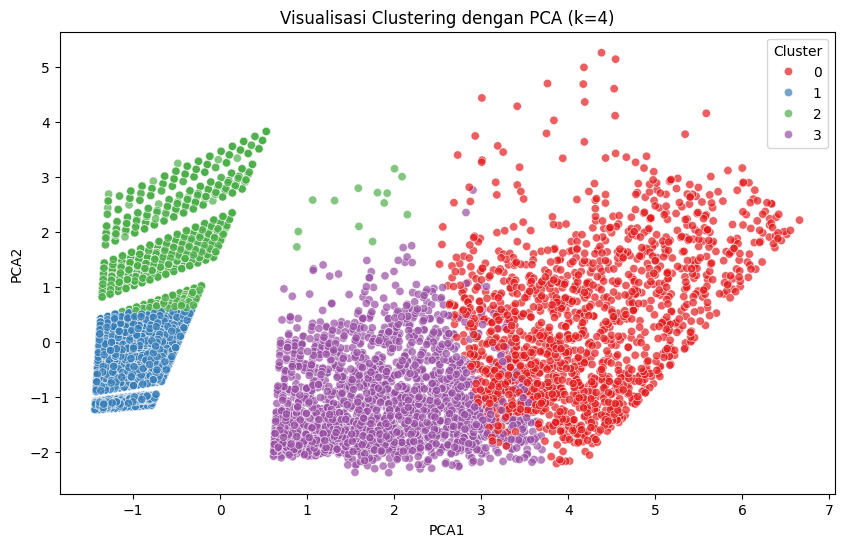

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_sampled[clustering_features])
df_sampled["PCA1"] = pca_result[:, 0]
df_sampled["PCA2"] = pca_result[:, 1]

# Plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Set1",
    data=df_sampled,
    alpha=0.7
)
plt.title("Visualisasi Clustering dengan PCA (k=4)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

## Interpretasi Target dan Invers Data

In [43]:
# Tambahkan cluster hasil KMeans ke dataframe yang sudah distandarisasi
df_sampled['Cluster'] = kmeans.labels_

# Salin dataframe untuk inverse transform
df_inverse = df_sampled.copy()

# Lakukan inverse transform untuk kolom numerik agar kembali ke skala asli
df_inverse[clustering_features] = scaler.inverse_transform(df_sampled[clustering_features])
df_inverse['Customer_Type'] = df_inverse['Customer_Type'].map({0: 'B2B', 1: 'B2C'})
df_inverse = df_inverse.drop(columns=['PCA1', 'PCA2'], errors='ignore')

df_inverse[clustering_features].head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type
0,1.87,18.0,0.05,31.98,B2B
1,1.64,4.0,0.00,6.56,B2C
2,1.74,5.0,0.00,8.70,B2C
3,1.80,15.0,0.00,27.00,B2C
4,0.98,6.0,0.05,5.59,B2B


In [44]:
df_inverse.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,B2B,Fritz-Kola,Soft Drinks,1.87,18.0,0.05,31.98,Bremen,2021-05-13,3
1,B2C,Granini Apple,Juices,1.64,4.0,0.00,6.56,Sachsen,2022-10-16,1
2,B2C,Pepsi,Soft Drinks,1.74,5.0,0.00,8.70,Niedersachsen,2023-08-13,1
3,B2C,Hohes C Orange,Juices,1.80,15.0,0.00,27.00,Saarland,2022-10-06,1
4,B2B,Vio Wasser,Water,0.98,6.0,0.05,5.59,Niedersachsen,2021-09-20,3


In [45]:
# Hitung rata-rata fitur numerik tiap cluster
cluster_summary = df_inverse.groupby('Cluster')[["Unit_Price", "Quantity", "Discount", "Total_Price"]].mean().reset_index()

# Hitung proporsi B2B / B2C per cluster
customer_type_dist = df_inverse.groupby('Cluster')['Customer_Type'].value_counts(normalize=True).unstack().fillna(0) * 100

# Lihat hasil
print(cluster_summary)
print("\nDistribusi Customer_Type per cluster (dalam %):")
print(customer_type_dist)

   Cluster  Unit_Price   Quantity  Discount  Total_Price
0        0    1.911493  46.572360  0.074413    77.109993
1        1    1.282135   7.712774  0.000000     9.615047
2        2    3.277106   8.730235  0.000196    28.027411
3        3    1.297985  19.239109  0.061238    20.166832

Distribusi Customer_Type per cluster (dalam %):
Customer_Type         B2B         B2C
Cluster                              
0              100.000000    0.000000
1                0.000000  100.000000
2                0.392275   99.607725
3              100.000000    0.000000


## **Analisis dan Interpretasi Hasil Cluster dari Model KMeans (k=4)**

### **Cluster 0**  
- Rata-rata Unit Price: **1.91**  
- Rata-rata Quantity: **46.57**  
- Rata-rata Discount: **0.0744** (7.44%)  
- Rata-rata Total Price: **77.11**  
- Distribusi Customer_Type: **100% B2B**  

**Analisis:**  
Cluster ini terdiri dari pelanggan **B2B** yang melakukan pembelian dalam jumlah besar (quantity tinggi), dengan potongan harga yang cukup tinggi, namun total transaksi tidak terlalu besar. Ini bisa jadi pelanggan reseller/grosir yang beli banyak produk dengan harga diskon untuk dijual kembali.

---

### **Cluster 1**  
- Rata-rata Unit Price: **1.28**  
- Rata-rata Quantity: **7.71**  
- Rata-rata Discount: **0.0** (tidak ada diskon)  
- Rata-rata Total Price: **9.62**  
- Distribusi Customer_Type: **100% B2C**  

**Analisis:**  
Cluster ini adalah pelanggan **B2C** dengan pembelian kecil-kecil, tidak mendapatkan diskon, dan total transaksinya rendah. Mereka adalah pelanggan retail biasa yang membeli untuk konsumsi pribadi.

---

### **Cluster 2**  
- Rata-rata Unit Price: **3.28**  
- Rata-rata Quantity: **8.73**  
- Rata-rata Discount: **0.0002** (nyaris tanpa diskon)  
- Rata-rata Total Price: **28.03**  
- Distribusi Customer_Type: **99.6% B2C**, ada sedikit B2B (0.4%)

**Analisis**

Cluster ini mayoritas adalah pelanggan **B2C**, tetapi berbeda dengan Cluster 1 karena harga per unitnya lebih mahal dan total belanjanya lebih tinggi. Ini bisa jadi kelompok konsumen premium atau mereka yang membeli produk-produk dengan harga lebih tinggi (contoh: alkohol, premium drinks).

---

### **Cluster 3**  
- Rata-rata Unit Price: **1.30**  
- Rata-rata Quantity: **19.24**  
- Rata-rata Discount: **0.0612** (6.12%)  
- Rata-rata Total Price: **20.17**  
- Distribusi Customer_Type: **100% B2B**  

**Analisis:**  
Cluster ini juga merupakan pelanggan **B2B**, tetapi dengan jumlah pembelian sedang dan diskon sedang. Kemungkinan besar mereka adalah bisnis kecil atau kantor yang membeli secara rutin tetapi tidak sebanyak cluster grosir (Cluster 0).  

# **7. Mengeksport Data**

In [46]:
# Ekspor df_inverse ke CSV dengan nama clustered_data.csv
df_inverse.to_csv("clustered_data.csv", index=False)

print("Data berhasil diekspor sebagai clustered_data.csv!")


Data berhasil diekspor sebagai clustered_data.csv!
